## Pytorch regression _2.3_ [AirQualityUCI.csv]
Work on diagnostic systems.
There is no progress in tank construction without diagnostics.
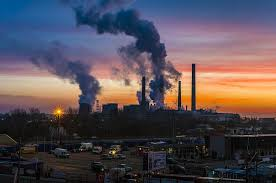



In [1]:
import torch

I'm starting a GPU graphics card (which I don't have)

<span style="color:green"> Odpalam karte graficzną GPU (której nie mam)

In [2]:
device = torch.device('cpu') # obliczenia robie na CPU
#device = torch.device('cuda') # obliczenia robie na GPU

### Output variables (3):
 - SLUMP (cm)
 - FLOW (cm)
 - 28-day Compressive Strength (Mpa)

In [3]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/2/AirQualityUCI.csv', sep=';')
print(df.shape)
df.head(3)

(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN


I fill all holes with values out of range

<span style="color:green"> Wypełniam wszystkie dziury wartościami z poza zakresu

In [4]:
a,b = df.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df.columns[i]
    r = df[i].isnull().sum()
    h = df[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------
Time -------- 114 -------- 9357 -------- 1.2183392112856686
CO(GT) -------- 114 -------- 9357 -------- 1.2183392112856686
PT08.S1(CO) -------- 114 -------- 9357 -------- 1.2183392112856686
NMHC(GT) -------- 114 -------- 9357 -------- 1.2183392112856686
C6H6(GT) -------- 114 -------- 9357 -------- 1.2183392112856686
PT08.S2(NMHC) -------- 114 -------- 9357 -------- 1.2183392112856686
NOx(GT) -------- 114 -------- 9357 -------- 1.2183392112856686
PT08.S3(NOx) -------- 114 -------- 9357 -------- 1.2183392112856686
NO2(GT) -------- 114 -------- 9357 -------- 1.2183392112856686
PT08.S4(NO2) -------- 114 -------- 9357 -------- 1.2183392112856686
PT08.S5(O3) -------- 114 -------- 9357 -------- 1.2183392112856686
T -------- 114 -------- 9357 -------- 1.2183392112856686
RH -------- 114 -------- 9357 -------- 1.2183392112856686
AH -------- 114 -------- 9357 -------- 1.2183392112856686
Unnamed: 15 -------- 9471 ----

/home/wojciech/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [5]:
import seaborn as sns

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
del df['Unnamed: 15']
del df['Unnamed: 16']

df = df.dropna(how='any') # jednak je kasuje te dziury

# df.fillna(-777, inplace=True)
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [7]:
print(df.dtypes)
df.head(3)

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"


### to_datetime

In [8]:
df['Date'] =  pd.to_datetime(df['Date'])
df['weekday'] = df.Date.dt.weekday
df['month'] =df.Date.dt.month
df['weekofyear'] =df.Date.dt.weekofyear 

In [9]:
del df['Date']

In [10]:
print(df.dtypes)
df.head(3)

Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
weekday            int64
month              int64
weekofyear         int64
dtype: object


,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,weekday,month,weekofyear
0,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",6,10,40
1,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",6,10,40
2,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",6,10,40


### Encodes text values

### <span style="color:green"> Koduje wartości tekstowe

In [11]:
import numpy as np

a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
CO(GT) --- object
C6H6(GT) --- object
T --- object
RH --- object
AH --- object


In [12]:
df['Time'] = pd.Categorical(df['Time']).codes
df['Time'] = df['Time'].astype(int)

In [13]:
df.dtypes

Time               int64
CO(GT)              int8
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)           int16
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                  int16
RH                 int16
AH                 int16
weekday            int64
month              int64
weekofyear         int64
dtype: object

In [14]:
df.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'weekday', 'month', 'weekofyear'],
      dtype='object')

### I specify what is X and what is y

### <span style="color:green"> Określam co jest X a co y

In [15]:
X = df.drop(['CO(GT)'],1)
y = df['CO(GT)']

### Scaling (normalization) of the X value

X should never be too big. Ideally, it should be in the range [-1, 1]. If this is not the case, normalize the input.

### <span style="color:green"> Skalowanie (normalizacja) wartości X

<span style="color:green"> X nigdy nie powinien być zbyt duży. Idealnie powinien być w zakresie [-1, 1]. Jeśli tak nie jest, należy znormalizować dane wejściowe.

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

print(np.round(X.std(), decimals=2), np.round(X.mean(), decimals=2))

1.0 0.0


In [17]:
y.value_counts()

0      1592
16      279
18      275
17      273
13      262
       ... 
101       1
22        1
102       1
87        1
99        1
Name: CO(GT), Length: 104, dtype: int64

In [18]:
y = (y / 10)  # max test score is 100
#print(y.head(3))
print(np.round(y.std(), decimals=2), np.round(y.mean(), decimals=2))

1.86 2.13


### Creates random input and output

### <span style="color:green"> Tworzy losowe dane wejściowe i wyjściowe 

In [19]:
import numpy as np

#X = X.values       #- jak była normalizacja to to nie działa
X = torch.tensor(X)
print(X[:3])

tensor([[ 0.9391,  0.9430,  2.2112, -1.0982,  0.4423, -0.0102,  0.8106,  0.4321,
          0.6433,  0.6411, -0.9377,  0.0588, -0.6647,  1.4930,  1.0552,  0.8894],
        [ 1.0836,  0.7368,  1.9394,  1.4092,  0.1765, -0.2549,  1.1771,  0.2667,
          0.3586, -0.0067, -0.9624, -0.0061, -0.7528,  1.4930,  1.0552,  0.8894],
        [ 1.2280,  1.0703,  1.7677,  1.3815,  0.1297, -0.1461,  1.0715,  0.4400,
          0.3500,  0.2165, -1.0777,  0.3347, -0.6871,  1.4930,  1.0552,  0.8894]],
       dtype=torch.float64)


In [20]:
X = X.type(torch.FloatTensor)
print(X[:3])

tensor([[ 0.9391,  0.9430,  2.2112, -1.0982,  0.4423, -0.0102,  0.8106,  0.4321,
          0.6433,  0.6411, -0.9377,  0.0588, -0.6647,  1.4930,  1.0552,  0.8894],
        [ 1.0836,  0.7368,  1.9394,  1.4092,  0.1765, -0.2549,  1.1771,  0.2667,
          0.3586, -0.0067, -0.9624, -0.0061, -0.7528,  1.4930,  1.0552,  0.8894],
        [ 1.2280,  1.0703,  1.7677,  1.3815,  0.1297, -0.1461,  1.0715,  0.4400,
          0.3500,  0.2165, -1.0777,  0.3347, -0.6871,  1.4930,  1.0552,  0.8894]])


In [21]:
y = y.values   # tworzymy macierz numpy - jak była normalizacja to to nie działa

In [22]:
y = torch.tensor(y)
print(y[:3])

tensor([3.3000, 2.6000, 2.9000], dtype=torch.float64)


### TRanspends the resulting vector to become a column
### <span style="color:green"> TRansponuje wektor wynikowy aby stał się kolumną</span>

In [23]:
y = y.type(torch.FloatTensor)

In [24]:
print('X:',X.shape)
print('y:',y.shape)

X: torch.Size([9357, 16])
y: torch.Size([9357])


Dodanie jednego wymiaru do wektora wynikowego

In [25]:
y = y.view(y.shape[0],1)
y.shape

torch.Size([9357, 1])

### Podział na zbiór testowy i zbiór treningowy

In [26]:
a,b = X.shape
a

total_records = a
test_records = int(a * .2)

X_train = X[:total_records-test_records]
X_test = X[total_records-test_records:total_records]

y_train = y[:total_records-test_records]
y_test = y[total_records-test_records:total_records]

In [27]:
print('X_train: ',X_train.shape)
print('X_test:  ',X_test.shape)
print('----------------------------------------------------')
print('y_train: ',y_train.shape)
print('y_test:  ',y_test.shape)

X_train:  torch.Size([7486, 16])
X_test:   torch.Size([1871, 16])
----------------------------------------------------
y_train:  torch.Size([7486, 1])
y_test:   torch.Size([1871, 1])


### Model

In [28]:
N, D_in = X_train.shape
N, D_out = y_train.shape

H = 100
device = torch.device('cpu')

In [29]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out),
        ).to(device)


### MSE loss function
### <span style="color:green"> Funkcja straty MSE

In [30]:
loss_fn = torch.nn.MSELoss(reduction='sum')

### Define of learning

### <span style="color:green"> Definiowanie nauki

In [31]:
y_pred = model(X_train)
y_pred[:5]

tensor([[-0.2812],
        [-0.1326],
        [-0.1032],
        [-0.0952],
        [-0.1497]], grad_fn=<SliceBackward>)

In [32]:
learning_rate = 0.00001
epochs = 3000
aggregated_losses = []

for t in range(epochs):
  
   y_pred = model(X_train)
            
 
   loss = loss_fn(y_pred, y_train) # <=# Obliczenie i wydruku straty. Mijamy Tensory zawierające przewidywane i prawdziwe
   
   if t % 300 == 0:  
      print(t, loss.item())     # <=# wartości y, a funkcja straty zwraca Tensor zawierający stratę.

   aggregated_losses.append(loss) ## potrzebne do wykresu    
  
   model.zero_grad()    #<= # Zeruj gradienty przed uruchomieniem przejścia do tyłu. 
   

   loss.backward()      #<== Przełożenie wsteczne: oblicz gradient gradientu w odniesieniu do wszystkich możliwych do nauczenia się
                                 # parametrów modelu. Wewnętrznie parametry każdego modułu są przechowywane
                                 # w Tensorach z requires_grad=True, więc to wywołanie obliczy gradienty
                                 # wszystkich możliwych do nauczenia parametrów w modelu.
  
   with torch.no_grad():              #<== Zaktualizuj ciężary za pomocą opadania gradientu. Każdy parametr jest tensorem, więc
     for param in model.parameters():         # możemy uzyskać dostęp do jego danych i gradientów tak jak wcześniej.
       param.data -= learning_rate * param.grad

0 57620.95703125
300 3887.6298828125
600 3504.96484375
900 3247.74169921875
1200 3244.993896484375
1500 3150.48681640625
1800 3007.068603515625
2100 2773.484619140625
2400 3253.34619140625
2700 2737.288330078125


### There are many potential reasons. Most likely exploding gradients. The two things to try first:

- Normalize the inputs
- Lower the learning rate




### <span style="color:green">Istnieje wiele potencjalnych przyczyn. Najprawdopodobniej wybuchające gradienty. Dwie rzeczy do wypróbowania w pierwszej kolejności:

 - <span style="color:green">- Normalizuj wejścia
 - <span style="color:green">- Obniż tempo uczenia msię

<function matplotlib.pyplot.show(*args, **kw)>

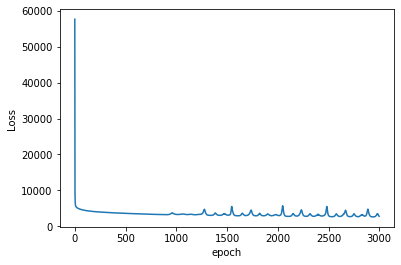

In [33]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show

###  Forecast based on the model
-  substitute the same equations that were in the model
-  The following loss result shows the last model sequence
-  Loss shows how much the model is wrong (loss = sum of error squares) after the last learning sequence

### <span style="color:green"> Prognoza na podstawie modelu
- <span style="color:green"> podstawiamy te same równania, które były w modelu 
- <span style="color:green"> Poniższy wynik loss pokazuje ostatnią sekwencje modelu
- <span style="color:green"> Loss pokazuuje ile myli się model (loss = suma kwadratu błedów) po ostatniej sekwencji uczenia się 
    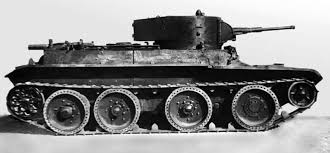

In [34]:
with torch.no_grad():
    y_pred = model(X_test)  
    loss = (y_pred - y_test).pow(2).sum()

    print(f'Loss train_set: {loss:.8f}')

Loss train_set: 1491.50219727


<span style="color:green">Ponieważ ustaliliśmy, że nasza warstwa wyjściowa będzie zawierać 1 neuron, każda prognoza będzie zawierać 1 wartości. Przykładowo pierwsze 5 przewidywanych wartości wygląda następująco:

In [35]:
y_pred[:5]

tensor([[1.6469],
        [1.7758],
        [1.4006],
        [2.5196],
        [2.7246]])

### We save the whole model

### <span style="color:green"> Zapisujemy cały model

In [36]:
torch.save(model,'/home/wojciech/Pulpit/7/byk15.pb')

### We play the whole model
### <span style="color:green"> Odtwarzamy cały model

In [37]:
KOT = torch.load('/home/wojciech/Pulpit/7/byk15.pb')
KOT.eval()

Sequential(
  (0): Linear(in_features=16, out_features=100, bias=True)
  (1): ReLU()
  (2): ReLU()
  (3): Linear(in_features=100, out_features=1, bias=True)
)

### By substituting other independent variables, you can get a vector of output variables
We choose a random record from the tensor

### <span style="color:green">Podstawiając inne zmienne niezależne można uzyskać wektor zmiennych wyjściowych
<span style="color:green"> Wybieramy sobie jakąś losowy rekord z tensora

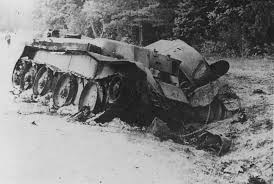

In [38]:
y_pred = y_pred*10
foka = y_pred.cpu().detach().numpy()
df11 = pd.DataFrame(foka)
df11.columns = ['y_pred']
df11=np.round(df11.y_pred)
df11.head(3)

0    16.0
1    18.0
2    14.0
Name: y_pred, dtype: float32

In [39]:
y_test = y_test*10
foka = y_test.cpu().detach().numpy()
df_t = pd.DataFrame(foka)
df_t.columns = ['y']
df_t.head(3)

,y
0,13.0
1,13.0
2,14.0


In [40]:
NOWA = pd.merge(df_t,df11, how='inner', left_index=True, right_index=True)
NOWA.head(3)

,y,y_pred
0,13.0,16.0
1,13.0,18.0
2,14.0,14.0


In [41]:
NOWA.to_csv('/home/wojciech/Pulpit/7/NOWA.csv')

Text(0.5, 1.0, 'COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

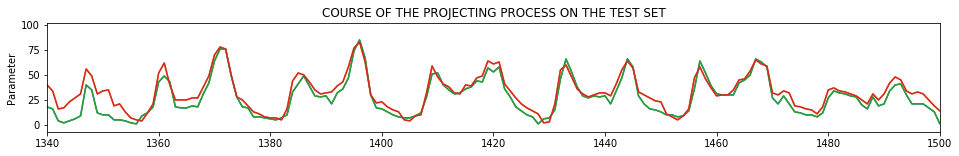

In [42]:
fig, ax = plt.subplots( figsize=(16, 2))
for ewa in ['y', 'y_pred']:
    ax.plot(NOWA, label=ewa)
    
ax.set_xlim(1340, 1500)
#ax.legend()
ax.set_ylabel('Parameter')
ax.set_title('COURSE OF THE PROJECTING PROCESS ON THE TEST SET')

<Figure size 432x288 with 0 Axes>

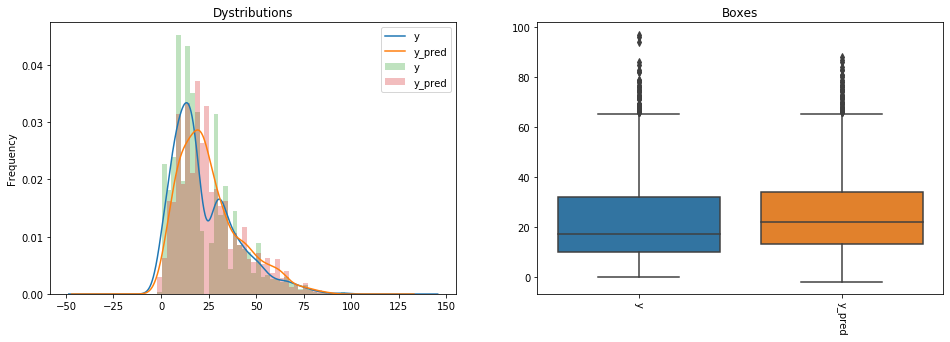

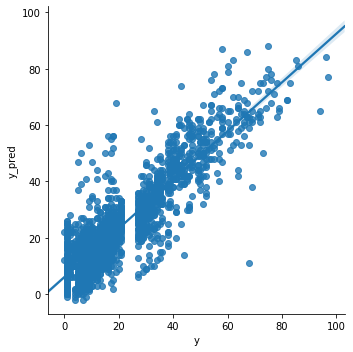

In [43]:
## marginesy
plt.subplots_adjust( left = None , bottom = None , right = None , top = None , wspace = None , hspace = None )
plt.figure(figsize=(16,5))
ax = plt.subplot(1, 2, 1)
NOWA.plot.kde(ax=ax, legend=True, title='Histogram: y vs. y_pred')
NOWA.plot.hist(density=True,bins=40, ax=ax, alpha=0.3)
ax.set_title("Dystributions")

ax = plt.subplot(1, 2, 2)
sns.boxplot(data = NOWA)
plt.xticks(rotation=-90)
ax.set_title("Boxes")


sns.lmplot(data=NOWA, x='y', y='y_pred')

# Regression_Assessment

In [44]:
## Robi ocenę tylko dla jednej zmiennej

def Regression_Assessment(y, y_pred):
    
    from sklearn.metrics import r2_score 
    import scipy.stats as stats
    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot
       
    print('-----two methods--------------')
    SS_Residual = sum((y-y_pred)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print('r2_score:           %0.3f' % r_squared)
    #print('adjusted_r_squared: %0.3f' % adjusted_r_squared)
    #print('----r2_score------secound-method--------')  
    print('r2_score:           %0.3f' % r2_score(y, y_pred))  
    print()
    print('-------------------------------')
    MAE = (abs(y-y_pred)).mean()
    print('Mean absolute error     MAE:  %0.2f ' %  MAE)
    RMSE = np.sqrt(((y-y_pred)**2).mean())
    print('Root mean squared error RMSE: %0.2f ' %  RMSE)
    pt = (100*(y-y_pred))/y
    MAPE = (abs(pt)).mean()
    print('Mean absolute error     MAPE: %0.2f ' %  MAPE)
    print('-------------------------------')
    
    stat,pvalue0 = stats.ttest_1samp(a=(y-y_pred),popmean=0.0)

    if pvalue0 > 0.01:
        print('t-test H0:suma reszt modelu wynosi zero--')
        print('OK! Resztki modelu nie różnią się od zera - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue0) 
    else:     
        print('Źle - Resztki modelu RÓŻNIĄ SIĘ OD ZERA - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue0)  
    print('--------------------------------------------------------------------------------------------') 
  
       
    stat,pvalue2_1 = stats.shapiro(y)
    stat,pvalue2_2 = stats.shapiro(y_pred)

    if pvalue2_1 > 0.01:
        #print('Shapiro-Wilk H0: y maj rozkład normalny?--------------------------------')
        print('OK Shapiro-Wilk! y maja rozkład normalny - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue2_1) 
    else:     
        print('Źle Shapiro-Wilk - y NIE MA ROZKŁADU NORMALNEGO - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue2_1)  
        print('--------------------------------------------------------------------------------------------')
    if pvalue2_2 > 0.01:
        #print('Shapiro-Wilk: y_pred maj rozkład normalny?--')
        print('OK Shapiro-Wilk! y_pred ma rozkład normalny - pvalue: %0.4f > 0.01 (NIE odrzucamy h0)'% pvalue2_2) 
    else:     
        print('Źle Shapiro-Wilk y_pred NIE MA ROZKŁADU NORMALNEGO - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue2_2)  
    
    qqplot(y, line='s')
    pyplot.show()

    qqplot(y_pred, line='s')
    pyplot.show()
       
    print('--------------------------------------------------------------------------------------------')
        
    stat,pvalue3 = stats.kruskal(y_pred,y)
    stat,pvalue4 = stats.f_oneway(y_pred,y)

    if pvalue2_1 < 0.01 or pvalue2_2 < 0.01:
        print('Shapiro-Wilk: Zmienne nie mają rozkładu normalnego! Nie można zrobić analizy ANOVA')
     
        if pvalue3 > 0.01:
            print('Kruskal-Wallis NON-PARAMETRIC TEST: czy prognoza i obserwacje empir. mają równe średnie?')
            print('OK! Kruskal-Wallis H0: prognoza i obserwacje empir. mają równe średnie - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue3) 
        else:     
            print('Źle - Kruskal-Wallis: prognoza i obserwacje empir. NIE MAJĄ równych średnich - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue3)  
    
    else:

        if pvalue4 > 0.01:
            print('F-test (ANOVA): czy prognoza i obserwacje empir. mają równe średnie?--------------------------------')
            print('OK! prognoza i obserwacje empir. mają równe średnie - pvalue: %0.4f > 0.01 (NIE odrzucamy H0)'% pvalue4) 
        else:     
            print('Źle - prognoza i obserwacje empir. NIE MAJĄ równych średnich - pvalue: %0.4f < 0.01 (Odrzucamy H0)'% pvalue4)  
    print('--------------------------------------------------------------------------------------------')

-----two methods--------------
r2_score:           0.723
r2_score:           0.723

-------------------------------
Mean absolute error     MAE:  6.38 
Root mean squared error RMSE: 8.93 
Mean absolute error     MAPE: inf 
-------------------------------
Źle - Resztki modelu RÓŻNIĄ SIĘ OD ZERA - pvalue: 0.0000 < 0.01 (Odrzucamy H0)
--------------------------------------------------------------------------------------------
Źle Shapiro-Wilk - y NIE MA ROZKŁADU NORMALNEGO - pvalue: 0.0000 < 0.01 (Odrzucamy H0)
--------------------------------------------------------------------------------------------
Źle Shapiro-Wilk y_pred NIE MA ROZKŁADU NORMALNEGO - pvalue: 0.0000 < 0.01 (Odrzucamy H0)


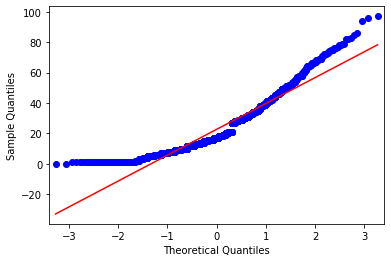

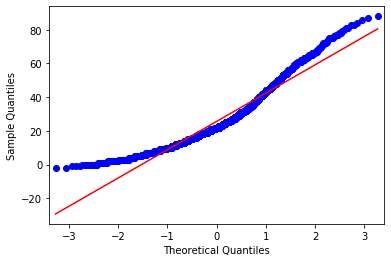

--------------------------------------------------------------------------------------------
Shapiro-Wilk: Zmienne nie mają rozkładu normalnego! Nie można zrobić analizy ANOVA
Źle - Kruskal-Wallis: prognoza i obserwacje empir. NIE MAJĄ równych średnich - pvalue: 0.0000 < 0.01 (Odrzucamy H0)
--------------------------------------------------------------------------------------------


In [45]:
y = NOWA['y']
y_pred = NOWA['y_pred']

Regression_Assessment(y, y_pred)

## Mean absolute error MAE i RMSE
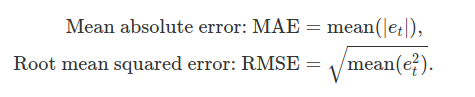

## Percentage errors MAPE



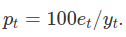